# Problem ​Description

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery and write an application that can
make these predictions.

Concretely, for a given delivery you must predict the ​**total delivery
duration seconds** , i.e., the time taken from

- Start:​ ​the​ ​time​ ​consumer​ ​submits​ ​the​ ​order ​ (​`created_at`) ​ to​
- End:​ ​when​ ​the​ ​order​ ​will​ ​be​ ​delivered​ to​ ​ ​the​ consumer​​
​(`actual_delivery_time`).

To​ ​help​ ​with​ ​this,​ ​we​ ​have​ ​provided

-   `historical_data.csv`:​ ​table​ ​of​ ​historical​ ​deliveries

-   `data_to_predict.json`: ​ ​Json​ ​list​ ​of​ ​deliveries​ ​that​ ​you​ ​must​
    ​predict​ ​on​ ​(for ​​the​ ​second​ ​part)

-   `data_description.txt`:​ ​ description​ ​ of​ ​ all​ ​ columns​ ​ in​​ `historical_data.csv`​ ​and​ ​details​ of​ `data_to_predict.json`

-   Build a model to predict the total delivery duration seconds



In [1]:
!cat data_description.txt

cat: data_description.txt: No such file or directory


In [2]:
!git clone --branch doordash_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/doordash_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1927 (delta 726), pack-reused 0
Receiving objects: 100% (1963/1963), 297.43 MiB | 7.59 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/takehomes/doordash_1
data_description.txt  historical_data.csv  metadata.json
data_to_predict.json  logo.png		   takehomefile.ipynb


In [3]:
import pandas as pd
import plotly.express as px

In [4]:
data = pd.read_csv('historical_data.csv', parse_dates=['created_at','actual_delivery_time'])
to_predict = pd.read_json('data_to_predict.json',lines=True)
info = pd.read_table('data_description.txt')

In [5]:
raw = pd.read_csv('historical_data.csv', parse_dates=['created_at','actual_delivery_time'])

In [6]:
def display(i):
  return i.head(5)

In [7]:
display(data)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [8]:
display(to_predict)

,total_items,total_outstanding_orders,delivery_id,estimated_order_place_duration,store_id,platform,market_id,created_at,max_item_price,num_distinct_items,min_item_price,store_primary_category,estimated_store_to_consumer_driving_duration,total_busy_dashers,order_protocol,subtotal,total_onshift_dashers
0,5,4,194096,446,5477,android,3,2015-02-25 02:22:30,1800,4,800,NA,670,4,1,7500,4
1,5,1,236895,446,5477,other,3,2015-02-25 01:14:19,1500,4,800,NA,446,1,1,7100,4
2,4,6,190868,446,5477,android,4,2015-02-22 02:27:44,1500,2,750,thai,504,7,1,4500,9
3,1,3,183076,446,5477,ios,3,2015-02-25 01:32:39,1400,1,1400,NA,687,3,1,1700,3
4,2,4,186200,446,2841,android,1,2015-02-24 05:20:45,1625,2,1525,italian,528,4,1,3150,4


In [9]:
info

,#### Data description ####
0,The attached file `historical_data.csv` contai...
1,The target value to predict here is the total ...
2,We have added noise to the dataset to obfuscat...
3,#### Columns in historical_data.csv
4,### Time features
5,market_id: A city/region in which DoorDash ope...
6,created_at: Timestamp in UTC when the order wa...
7,actual_delivery_time: Timestamp in UTC when th...
8,### Store features
9,store_id: an id representing the restaurant th...


In [10]:
data['duration'] = (data['actual_delivery_time']-data['created_at']).dt.total_seconds()

In [11]:
display(data)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [12]:
data.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
duration                                            7
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
duration                                        0
dtype: int64

In [15]:
data.describe()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,duration
count,175777.000000,175777,175777,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,2015-02-04 19:57:50.009631744,2015-02-04 20:45:36.432303616,3556.299561,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,307.818105,546.077240,2866.422672
min,1.000000,2015-01-21 15:22:03,2015-01-21 16:16:34,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,101.000000
25%,2.000000,2015-01-29 01:31:19,2015-01-29 02:18:30,1703.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,384.000000,2105.000000
50%,2.000000,2015-02-05 02:41:26,2015-02-05 03:45:31,3620.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000,2662.000000
75%,4.000000,2015-02-12 01:04:32,2015-02-12 01:47:32,5341.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,703.000000,3383.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,6987.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,373879.000000
std,1.330963,NaN,NaN,2055.959006,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,89.796587,218.717798,1660.741001


In [16]:
px.bar(data.market_id.value_counts(),color=data.market_id.unique())

In [17]:
px.bar(data.order_protocol.value_counts(),color=data.order_protocol.unique())

In [18]:
px.bar(data.store_primary_category.value_counts(),color=data.store_primary_category.unique())

In [19]:
px.histogram(x=data.subtotal,y=data.duration,histfunc='count')

Output hidden; open in https://colab.research.google.com to view.

In [20]:
px.bar(data.actual_delivery_time.dt.day_name().value_counts(),color=data.actual_delivery_time.dt.day_name().unique())

In [21]:
px.bar(data.actual_delivery_time.dt.month_name().value_counts(),color=data.actual_delivery_time.dt.month_name().unique())

In [22]:
px.bar(data.actual_delivery_time.dt.day.value_counts(),color=data.actual_delivery_time.dt.day.unique())

In [23]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [24]:
start = raw.created_at.dt.date.min()
end = raw.created_at.dt.date.max()
holidays = calendar().holidays(start=start, end=end, return_name=True)
print(f'Holidays in range ({start} - {end}):\n', holidays)


Holidays in range (2014-10-19 - 2015-02-18):
 2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington’s Birthday
dtype: object


In [25]:
dates_with_margin = pd.date_range(
        start - pd.DateOffset(months=1),
        end + pd.DateOffset(months=4))

In [26]:
dates_with_margin

DatetimeIndex(['2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-27', '2014-09-28',
               ...
               '2015-06-09', '2015-06-10', '2015-06-11', '2015-06-12',
               '2015-06-13', '2015-06-14', '2015-06-15', '2015-06-16',
               '2015-06-17', '2015-06-18'],
              dtype='datetime64[ns]', length=273, freq='D')

In [27]:
holidays = calendar().holidays(
    start=dates_with_margin.min(),
    end=dates_with_margin.max(), return_name=True)

In [28]:
holidays

2014-10-13                           Columbus Day
2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington’s Birthday
2015-05-25                           Memorial Day
dtype: object

In [29]:
is_holiday = pd.Series(pd.Series(dates_with_margin).isin(holidays).values, index=dates_with_margin)


In [30]:
is_holiday.sum()

0

In [31]:
data.duration.quantile(0.9999)

23369.459199979727

In [32]:
# # less than 0.01% of deliveries were longer than 6 hours or 23369.4 seconds
# so we count them as outliers

In [33]:
# cleaning data

In [34]:
raw.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [35]:
raw['duration'] = (raw.actual_delivery_time - raw.created_at).dt.total_seconds()

In [36]:
date_outlier = pd.to_datetime('2014-12-31')
duration_outlier = 60*60*6 # 6 hours
# cleaned_data = raw[
#     raw.created_at > date_outliers_threshold
# ]

In [37]:
raw.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
duration                                            7
dtype: int64

In [38]:
cleaned_raw = raw[
    raw.created_at > date_outlier
][
    raw.duration < duration_outlier
].dropna(how='any',
         subset=[
             'duration',
             'market_id',
             'store_primary_category',
             'order_protocol',
             'total_onshift_dashers',
             'total_busy_dashers',
             'total_outstanding_orders'
         ])


<ipython-input-38-d358972fe17e>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [39]:
print("Old dataset size: ", (raw.shape), "----->", "New dataset size: ", (cleaned_raw.shape))

Old dataset size:  (197428, 17) -----> New dataset size:  (176225, 17)


In [146]:
cleaned_raw.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0


In [41]:
#extracting numerical features (basic)

In [42]:
basic_features  = cleaned_raw[[
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_order_place_duration',
    'estimated_store_to_consumer_driving_duration',
    ]]

In [145]:
basic_features.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0


In [44]:
# One hot encoding categorical variables

In [144]:
alphabetic_col = cleaned_raw[[
    'market_id',
    'order_protocol',
    'store_primary_category'
]]
alphabetic_col.head()

,market_id,order_protocol,store_primary_category
0,1.0,1.0,american
1,2.0,2.0,mexican
8,2.0,3.0,indian
14,1.0,1.0,italian
15,1.0,1.0,italian


In [46]:
from sklearn.preprocessing import OneHotEncoder as ohe

In [47]:
encoder = ohe()

In [48]:
encoder.fit(alphabetic_col[['market_id','order_protocol','store_primary_category']])

OneHotEncoder()

In [49]:
encoded_column = encoder.transform(alphabetic_col[['market_id','order_protocol','store_primary_category']]).toarray()

In [50]:
print(encoded_column.shape)

(176225, 86)


In [51]:
encoded_values = pd.concat([pd.DataFrame(encoded_column, columns=encoder.get_feature_names_out(['market_id','order_protocol','store_primary_category']))], axis=1)

In [143]:
encoded_values.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# merge encoded_column with cleaned_raw and dont reset the index and call it encoded_table

In [54]:
encoded_table = pd.merge(basic_features, encoded_values, left_index=True, right_index=True, how='left')

In [142]:
encoded_table.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
encoded_table.shape

(176225, 96)

In [141]:
encoded_table.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
#calender features

In [59]:
cleaned_raw.shape

(176225, 17)

In [60]:
import numpy as np

In [61]:
def harmonic_func(value,period):
  value *= 2 * np.pi/period
  return np.cos(value), np.sin(value)

In [62]:
# df = pd.DataFrame(cleaned_raw['created_at'].dt.normalize().unique())
df = pd.DataFrame(index=data.created_at.dt.normalize().unique())


In [63]:
df['cos_day'],df['sin_day'] = harmonic_func(df.index.day, df.index.days_in_month)

In [64]:
df['cos_week'],df['sin_week'] = harmonic_func(df.index.day_of_week, 7)

In [65]:
df['cos_month'],df['sin_month'] = harmonic_func(df.index.month, 12)

In [66]:
df['cos_quater'],df['sin_quater'] = harmonic_func(df.index.quarter, 4)

In [67]:
df['cos_year'],df['sin_year'] = harmonic_func(df.index.year, 365)

In [140]:
df.head(3)

,cos_day,sin_day,cos_week,sin_week,cos_month,sin_month,cos_quater,sin_quater,cos_year,sin_year,is_holiday
2015-02-06,0.222521,0.974928,-0.900969,-0.433884,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
2015-02-10,-0.623490,0.781831,0.623490,0.781831,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
2015-02-16,-0.900969,-0.433884,1.000000,0.000000,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,True


In [69]:
df['is_holiday'] = df.index.isin(holidays)

In [70]:
dates_extended = pd.date_range(pd.to_datetime(df.index.min()) - pd.DateOffset(months=4), pd.to_datetime(df.index.max()) + pd.DateOffset(months=4))

In [71]:
holiday_ = calendar().holidays(start = dates_extended.min(), end = dates_extended.max())

In [72]:
df['is_holiday'] = df.index.isin(holiday_)

In [73]:
df.head()

,cos_day,sin_day,cos_week,sin_week,cos_month,sin_month,cos_quater,sin_quater,cos_year,sin_year,is_holiday
2015-02-06,0.222521,0.974928,-0.900969,-0.433884,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
2015-02-10,-0.623490,0.781831,0.623490,0.781831,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
2015-02-16,-0.900969,-0.433884,1.000000,0.000000,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,True
2015-02-12,-0.900969,0.433884,-0.900969,0.433884,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
2015-01-27,0.688967,-0.724793,0.623490,0.781831,0.866025,0.500000,6.123234e-17,1.0,-0.991677,-0.128748,False


In [74]:
# prompt: combine cleaned_raw.created_at.dt.normalize() and df together with index being the same as cleaned_raw

# combined_df = pd.merge(cleaned_raw.created_at.dt.normalize(), df, left_index=True, right_index=True, how='left')


In [75]:
# combined_df

In [76]:
calender_features = pd.DataFrame({'normalized_date': cleaned_raw.created_at.dt.normalize()}, index=cleaned_raw.index)\
        .merge(df.fillna(0), left_on='normalized_date', right_index=True)\
        .drop(columns=['normalized_date'])

In [77]:
calender_features.head()

,cos_day,sin_day,cos_week,sin_week,cos_month,sin_month,cos_quater,sin_quater,cos_year,sin_year,is_holiday
0,0.222521,0.974928,-0.900969,-0.433884,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
16,0.222521,0.974928,-0.900969,-0.433884,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
51,0.222521,0.974928,-0.900969,-0.433884,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
72,0.222521,0.974928,-0.900969,-0.433884,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False
121,0.222521,0.974928,-0.900969,-0.433884,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False


In [78]:
calender_features.shape

(176225, 11)

In [79]:
min_cos, min_sin = harmonic_func(cleaned_raw.created_at.dt.hour*60+cleaned_raw.created_at.dt.minute,24*60*60)

In [80]:
time_features = pd.DataFrame({'min_cos':min_cos,'min_sin':min_sin}, index=cleaned_raw.index)

In [139]:
time_features.head()

,min_cos,min_sin
0,0.995227,0.097583
1,0.995473,0.095049
8,1.000000,0.000800
14,0.999877,0.015707
15,0.999954,0.009599


In [82]:
encoded_values.shape

(176225, 86)

In [83]:
for i in [basic_features, encoded_table, calender_features, time_features]:
  print(i.columns)

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')
Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'market_id_1.0',
       'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0',
       'market_id_6.0', 'order_protocol_1.0', 'order_protocol_2.0',
       'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0',
       'order_protocol_6.0', 'order_protocol_7.0',
       'store_primary_category_afghan', 'store_primary_category_african',
       'store_primary_category_alcohol',
       'store_primary_category_alcohol

In [84]:
# Features summary

In [85]:
features = pd.concat([basic_features, encoded_table, calender_features, time_features],axis=1)

In [138]:
features.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,sin_week,cos_month,sin_month,cos_quater,sin_quater,cos_year,sin_year,is_holiday,min_cos,min_sin
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,-0.433884,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.995227,0.097583
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0.781831,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.995473,0.095049
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,...,0.000000,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,True,1.000000,0.000800
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,...,0.433884,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.999877,0.015707
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,...,0.781831,0.866025,0.500000,6.123234e-17,1.0,-0.991677,-0.128748,False,0.999954,0.009599


In [87]:
# prompt: remove duplicate columns in features

features = features.loc[:,~features.columns.duplicated()]


In [137]:
# for i in features.columns:
#   print(i)

In [89]:
# Target

In [90]:
target = cleaned_raw.reindex(columns=['duration'])

In [134]:
target.head(3)

,duration
0,3779.0
1,4024.0
8,1586.0


In [92]:
# saved prepared dataset

In [133]:
dataset = pd.concat([features,target],axis=1)
dataset.head(3)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,cos_month,sin_month,cos_quater,sin_quater,cos_year,sin_year,is_holiday,min_cos,min_sin,duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.995227,0.097583,3779.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.995473,0.095049,4024.0
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,...,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,True,1.000000,0.000800,1586.0


In [132]:
# for i in dataset.columns:
#   print(i)

In [95]:
# from google.colab import drive
# drive.mount('/content/drive')

In [96]:
# prompt: save the csv file in my drive

# dataset.to_csv('/content/drive/My Drive/cleaned_data_new.csv')


In [97]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [98]:
cleaned_df = dataset

In [99]:
# for i  in cleaned_df.columns:
#   print(i)

In [100]:
cleaned_df.reset_index(drop=True)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,cos_month,sin_month,cos_quater,sin_quater,cos_year,sin_year,is_holiday,min_cos,min_sin,duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.995227,0.097583,3779.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.995473,0.095049,4024.0
2,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,...,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,True,1.000000,0.000800,1586.0
3,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,...,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.999877,0.015707,2273.0
4,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,...,0.866025,0.500000,6.123234e-17,1.0,-0.991677,-0.128748,False,0.999954,0.009599,2988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176220,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,...,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.999999,0.001382,3907.0
176221,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,...,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,1.000000,0.000073,3383.0
176222,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,...,0.866025,0.500000,6.123234e-17,1.0,-0.991677,-0.128748,False,0.999784,0.020797,3008.0
176223,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,...,0.500000,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.996814,0.079764,3907.0


In [101]:
# for i in cleaned_df.columns:
#   print(i)

In [102]:
print(cleaned_df.index.duplicated().any())


False


In [103]:
# prompt: create a dataframe y that takes duration from clean_df and reindex it

y= cleaned_df['duration'].to_frame()

In [104]:
y = y.reset_index(drop=True)


In [105]:
assert y.isnull().any().any() == False

In [106]:
y

,duration
0,3779.0
1,4024.0
2,1586.0
3,2273.0
4,2988.0
...,...
176220,3907.0
176221,3383.0
176222,3008.0
176223,3907.0


In [107]:
x = cleaned_df.drop(columns=['duration'])

In [108]:
x = x.reset_index(drop=True)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=2)

In [110]:
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(140980, 109)
(35245, 109)
(140980, 1)
(35245, 1)


In [111]:
cleaned_df = cleaned_df.reset_index(drop=True)

In [112]:
cleaned_df.head(1)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,cos_month,sin_month,cos_quater,sin_quater,cos_year,sin_year,is_holiday,min_cos,min_sin,duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0.5,0.866025,6.123234e-17,1.0,-0.991677,-0.128748,False,0.995227,0.097583,3779.0


In [113]:
basic_features_x = cleaned_df[['total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_order_place_duration',
    'estimated_store_to_consumer_driving_duration']]


In [131]:
# for i in cleaned_df.columns:
#   print(i)

In [115]:
basic_features_x.head(5)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
3,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
4,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0


In [116]:
basic_x_train, basic_x_test, basic_y_train, basic_y_test = train_test_split(basic_features_x,y, test_size=.2, shuffle=True, random_state=2)

In [117]:
basic_x_train = basic_x_train.fillna(0)
basic_x_test = basic_x_test.fillna(0)

In [118]:
for i in [basic_x_train, basic_y_train, basic_x_test, basic_y_test]:
  print(i.shape)

(140980, 10)
(140980, 1)
(35245, 10)
(35245, 1)


In [119]:
basic_x_train.columns
# basic_y_test.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [130]:
model = xgboost.XGBRegressor()
history = model.fit(
    basic_x_train, basic_y_train,
    eval_set=[(basic_x_test, basic_y_test)],
    eval_metric=['rmse', 'mae'],
    verbose = 0,
    early_stopping_rounds=10)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



<Axes: >

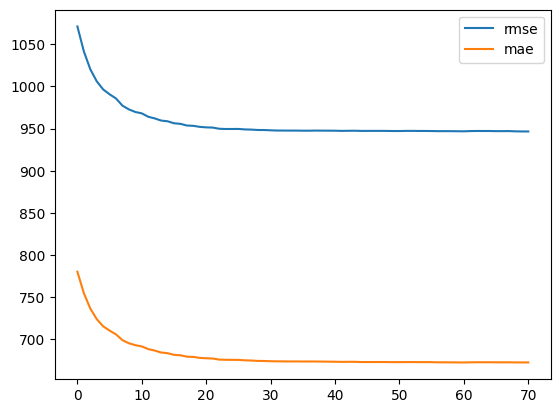

In [121]:
pd.DataFrame(history.evals_result()['validation_0']).plot()

In [122]:
# model = xgboost.XGBRegressor()
# params={
#     'booster': ['gbtree'], #['dart'] - best but shap not supported, #['gbtree', 'gblinear', 'dart'],
#     'objective': ['reg:gamma'], #['reg:squarederror', 'reg:squaredlogerror', 'reg:logistic', 'reg:gamma'],
#     'max_depth': [7], #[3, 4, 5, 6, 7, 10, 15], #--
#     'learning_rate': [0.05, 0.1, 0.15], #--
#     'n_estimators': [300, 350, 400],
# #     'min_child_weight': [1, 10], #++
# #     'colsample_bytree': [0.8],
# #     'subsample': [0.75],
# #     'reg_alpha': [0],
# #     'reg_lambda': [2],
# #     'gamma' : [0],
# }
# cv = KFold(5, shuffle=True, random_state=2)
# rs = GridSearchCV(
#     model,
#     params,
#     cv=cv,
#     scoring="neg_mean_squared_error",
#     n_jobs=5,
#     verbose=10)

# rs.fit(
#     x,
#     y,
#     verbose=False)
# print('best params:', rs.best_params_)

In [123]:
# best_params = {'objective': 'reg:gamma', 'max_depth': 6, 'n_estimators': 200}
best_params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'max_depth': 7,
    'learning_rate': 0.15,
    'n_estimators': 350,
}

In [129]:
model = xgboost.XGBRegressor(**best_params)
history = model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    eval_metric=['mae', 'rmse'],
    verbose = 0,
    early_stopping_rounds=int(best_params.get('n_estimators', 100) * 0.1))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



<Axes: >

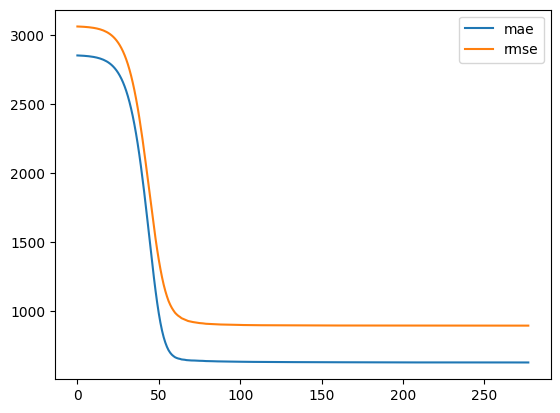

In [125]:
pd.DataFrame(history.evals_result()['validation_0']).plot()

In [126]:
y_true = y_test
y_pred = model.predict(x_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MAE: ', mean_absolute_error(y_true, y_pred))

RMSE:  894.882645023995
MAE:  628.7886865081982


<Axes: >

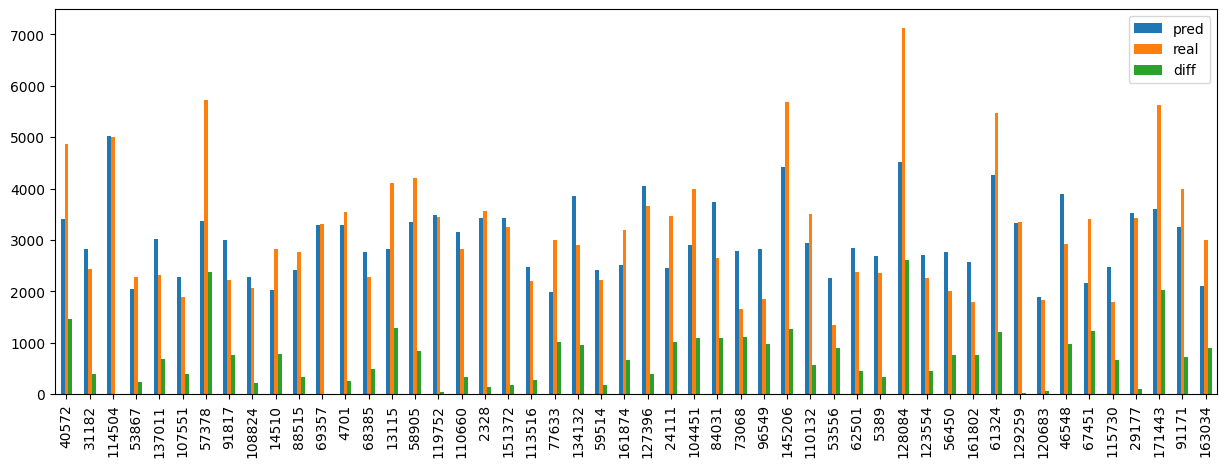

In [127]:
pd.DataFrame({
    'pred': y_pred,
    'real': y_true.duration,
    'diff': (y_pred - y_true.duration).abs(),
}).iloc[:50].plot.bar(figsize=(15,5))